In [1]:
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("GenericAppName") \
    .getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)

C:\temp\Hadoop\spark-3.3.0-bin-hadoop3\python\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [2]:
from pyspark import SparkFiles

# col_names = ["duration","protocol_type","service","flag","src_bytes",
#     "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
#     "logged_in","num_compromised","root_shell","su_attempted","num_root",
#     "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
#     "is_host_login","is_guest_login","count","srv_count","serror_rate",
#     "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
#     "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#     "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
#     "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
#     "dst_host_rerror_rate","dst_host_srv_rerror_rate","classes","difficulty_level"]

# data_url = "https://www.andrew.cmu.edu/user/mfarag/14813/KDDTrain+.txt"
# spark.sparkContext.addFile(data_url)
players_15 = spark.read.csv('FIFA_DATA/players_15.csv',header=True, inferSchema = True)
players_16 = spark.read.csv('FIFA_DATA/players_16.csv',header=True, inferSchema = True)
players_17 = spark.read.csv('FIFA_DATA/players_17.csv',header=True, inferSchema = True)
players_18 = spark.read.csv('FIFA_DATA/players_18.csv',header=True, inferSchema = True)
players_19 = spark.read.csv('FIFA_DATA/players_19.csv',header=True, inferSchema = True)
players_20 = spark.read.csv('FIFA_DATA/players_20.csv',header=True, inferSchema = True)
players_21 = spark.read.csv('FIFA_DATA/players_21.csv',header=True, inferSchema = True)
players_22 = spark.read.csv('FIFA_DATA/players_22.csv',header=True, inferSchema = True)

# nslkdd_test_raw = spark.read.csv('./NSL-KDD/KDDTest+.txt',header=False).toDF(*col_names)
# df = spark.read.csv(SparkFiles.get("KDDTrain+.txt"),header=False, inferSchema= True).toDF(*col_names)
# If you want to read file on the filesystem, use spark.read.csv(fileLocation, header=False, inferSchema=True)

In [26]:
print(players_15.columns[55])

movement_agility


In [3]:
from pyspark.sql.functions import lit

players_15 = players_15.withColumn('Year', lit(2015))
players_16 = players_16.withColumn('Year', lit(2016))
players_17 = players_17.withColumn('Year', lit(2017))
players_18 = players_18.withColumn('Year', lit(2018))
players_19 = players_19.withColumn('Year', lit(2019))
players_20 = players_20.withColumn('Year', lit(2020))
players_21 = players_21.withColumn('Year', lit(2021))
players_22 = players_22.withColumn('Year', lit(2022))


In [4]:
from pyspark.sql import functions as sf

players_15 = players_15.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_16 = players_16.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_17 = players_17.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_18 = players_18.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_19 = players_19.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_20 = players_20.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_21 = players_21.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_22 = players_22.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))

In [5]:
data = players_15.union(players_16)
data = data.union(players_17)
data = data.union(players_18)
data = data.union(players_19)
data = data.union(players_20)
data = data.union(players_21)
data = data.union(players_22)

In [6]:
db_properties={}
#update your db username
db_properties['username']="postgres"
#update your db password
db_properties['password']="psql"
#make sure you got the right port number here
db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
#make sure you had the Postgres JAR file in the right location
db_properties['driver']="org.postgresql.Driver"
db_properties['table']= "fifa.data"



data.write.format("jdbc")\
.mode("overwrite")\
.option("url", db_properties['url'])\
.option("dbtable", db_properties['table'])\
.option("user", db_properties['username'])\
.option("password", db_properties['password'])\
.option("Driver", db_properties['driver'])\
.save()


In [7]:
data.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable

In [8]:
data_read = sqlContext.read.format("jdbc")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .load()

data_read.show(1, vertical=True)

-RECORD 0-------------------------------------------
 sofifa_id                   | 207491               
 player_url                  | https://sofifa.co... 
 short_name                  | R. Gaffney           
 long_name                   | Rory Nicholas Gaf... 
 player_positions            | ST                   
 overall                     | 63                   
 potential                   | 63                   
 value_eur                   | 350000.0             
 wage_eur                    | 3000.0               
 age                         | 26                   
 dob                         | 1989-10-23 00:00:00  
 height_cm                   | 184                  
 weight_kg                   | 76                   
 club_team_id                | 1962.0               
 club_name                   | Bristol Rovers       
 league_name                 | English League One   
 league_level                | 3                    
 club_position               | SUB            

In [19]:
highest_number_club = data_read.where(data_read['Year']=='2022').groupBy("club_name").count().sort("count",ascending=False).limit(36).where(data_read['club_name']!='None').toPandas()
print("club with highest numbers:",highest_number_club['club_name'].values)

club with highest numbers: ['Norwich City' 'FC Barcelona' 'ESTAC Troyes' 'RC Celta de Vigo'
 'RCD Espanyol de Barcelona' 'Newcastle United' 'Paris Saint-Germain'
 'Crystal Palace' 'Burnley' 'Granada CF' 'RCD Mallorca' 'Genoa'
 'Real Madrid CF' 'Manchester United' 'Arsenal' 'Brentford'
 'VfB Stuttgart' 'Real Betis Balompié' 'CA Osasuna' 'Villarreal CF'
 'Southampton' 'Leicester City' 'Venezia FC' 'Valencia CF'
 'Borussia Mönchengladbach' 'Tottenham Hotspur' 'Sevilla FC'
 'TSG Hoffenheim' 'Wolverhampton Wanderers' 'Brighton & Hove Albion'
 'Liverpool' 'Olympique de Marseille' 'Chelsea' 'Everton'
 'West Ham United']


                    club_name  count
0                        None     61
1            RC Celta de Vigo     33
2   RCD Espanyol de Barcelona     33
3                FC Barcelona     33
4                RCD Mallorca     33
5                       Genoa     33
6              Real Madrid CF     33
7                ESTAC Troyes     33
8                Norwich City     33
9               VfB Stuttgart     33
10        Real Betis Balompié     33
11           Newcastle United     33
12                    Arsenal     33
13                  Brentford     33
14          Manchester United     33
15          Tottenham Hotspur     33
16                 Sevilla FC     33
17             TSG Hoffenheim     33
18    Wolverhampton Wanderers     33
19     Brighton & Hove Albion     33
20                  Liverpool     33
21     Olympique de Marseille     33
22                    Chelsea     33
23                    Everton     33
24            West Ham United     33
25    Levante Unión Deportiva     33
2

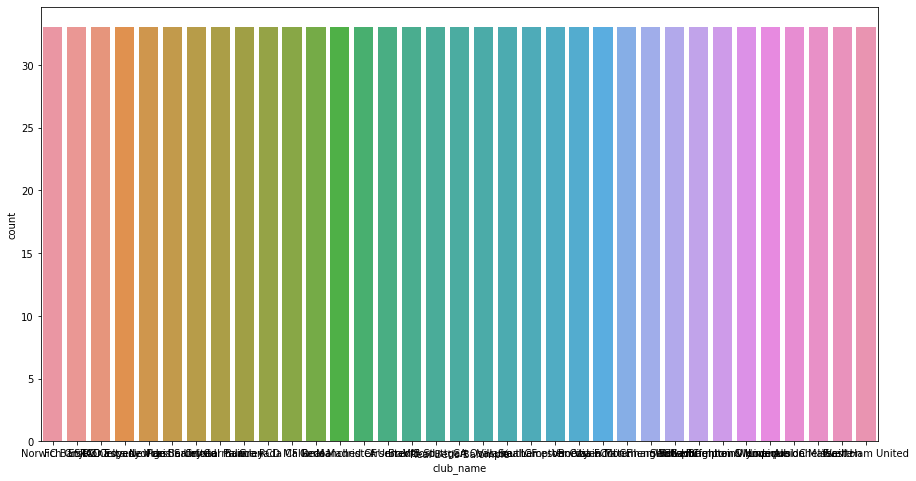

In [20]:
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt

top_50_highest_number_club = data_read.where(data_read['Year']=='2022').groupBy("club_name").count().sort("count",ascending=False).limit(50).toPandas()
print(top_50_highest_number_club)
plt.figure( figsize = ( 15, 8 ) )
sns.barplot( x="club_name", y="count", data=highest_number_club)
plt.show()

In [ ]:
# from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# # casted_types_df = casted_types_df.drop('GameClock')
# null_data = data_read.select([count(when(isnan(c) | col(c).isNull() , c)).alias(c) \
#                         for c in data_read.columns if c not in ('timestamp', 'string', 'date')])
# null_data_1 = data_read.select([count(when(col(c) == "NA" , c)).alias(c) \
#                         for c in data_read.columns])
# null_data.show(truncate=False, vertical=True)
# null_data_1.show(truncate=False, vertical=True)

In [27]:
import numpy as np
highest_number_over27_count = data_read.where(data_read['age']>27).groupBy("club_name").count().sort("count",ascending=False).toPandas()
highest_number_over27_sum = data_read.where(data_read['age']>27).groupBy("club_name").sum('age').toPandas()
# highest_number_over27_value = highest_number_over27['age'].values
# .sort("count",ascending=False).limit(50).toPandas()
print(highest_number_over27_count)
print(highest_number_over27_sum)
average_over27 = highest_number_over27_sum['sum(age)'].values/highest_number_over27_count['count'].values
print(type(average_over27),average_over27)

                   club_name  count
0                       None    874
1     İstanbul Başakşehir FK    133
2     Jeonbuk Hyundai Motors    118
3        FC Lokomotiv Moscow    108
4             Crystal Palace    106
...                      ...    ...
1007     Caracas Fútbol Club      3
1008          SC Freiburg II      2
1009            FC Helsingør      2
1010            FC Dordrecht      1
1011    Borussia Dortmund II      1

[1012 rows x 2 columns]
                       club_name  sum(age)
0                        Palermo      1105
1     CD Everton de Viña del Mar      1014
2                Shonan Bellmare      1676
3                    Yeovil Town       847
4                     Göztepe SK      1553
...                          ...       ...
1007                        Bury      1731
1008            Rotherham United      1945
1009                 Bohemian FC      1269
1010               Middlesbrough      2064
1011                        Como       219

[1012 rows x 2 columns]
<c

In [28]:
highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False).limit(5).toPandas()
print(highest_number_over27_avg)

               club_name   avg(age)
0            Yokohama FC  34.703704
1         Wexford Youths  34.000000
2     Zamora Fútbol Club  33.857143
3  Centro Atlético Fénix  33.600000
4         CF Fuenlabrada  33.545455


In [29]:
top1_highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False).limit(1).where(data_read['club_name']!='None').toPandas()
print("club with highest numbers over 27:",top1_highest_number_over27_avg['club_name'].values)

club with highest numbers over 27: ['Yokohama FC']


In [30]:
most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2015:",most_frequent_nation_2015['nation_position'].values)
most_frequent_nation_2016 = data_read.where(data_read['Year']==2016).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2016:",most_frequent_nation_2016['nation_position'].values)
most_frequent_nation_2017 = data_read.where(data_read['Year']==2017).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2017:",most_frequent_nation_2017['nation_position'].values)
most_frequent_nation_2018 = data_read.where(data_read['Year']==2018).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2018:",most_frequent_nation_2018['nation_position'].values)
most_frequent_nation_2019 = data_read.where(data_read['Year']==2019).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2019:",most_frequent_nation_2019['nation_position'].values)
most_frequent_nation_2020 = data_read.where(data_read['Year']==2020).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2020:",most_frequent_nation_2020['nation_position'].values)
most_frequent_nation_2021 = data_read.where(data_read['Year']==2021).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2021:",most_frequent_nation_2021['nation_position'].values)
most_frequent_nation_2022 = data_read.where(data_read['Year']==2022).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2022:",most_frequent_nation_2022['nation_position'].values)

Most frequent nation position 2015: ['SUB']
Most frequent nation position 2016: ['SUB']
Most frequent nation position 2017: ['SUB']
Most frequent nation position 2018: ['SUB']
Most frequent nation position 2019: ['SUB']
Most frequent nation position 2020: ['SUB']
Most frequent nation position 2021: ['SUB']
Most frequent nation position 2022: ['SUB']


In [31]:
most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(5).toPandas()
print(most_frequent_nation_2015)

  nation_position  count
0            None  15074
1             SUB    564
2              GK     47
3             RCB     47
4             LCB     47
